<h1><center><p style="color:#2F4F4F"> Titanic Survivor Predictions MiniProject </p></center></h1>

The Titanic data set is well-known when it comes to Machine Learning Algorithms. The goal of this MiniProject is to train a logistic regression model so as to make predictions on whether people with certain 'features' would have survived the titanic accident or not. 

The data used in this project was acquired through Kaggle.com

We will carry out the following steps in order to produce our model:


<strong>1) Import the necessary libraries</strong>

<strong>2) Inspect the data to find insightful relationships</strong>

<strong>3) Data Cleaning:<br></strong>
a) impute any data so that it is in a form which can be used  by the algorithm   
b) convert categorical data to binary

<strong>4) Logistic Regression Model:<br></strong>
a) Train our model with training data<br> 
b) Make predictions with our test data 

<strong>5) Evaluate our ML model</strong>

<h2> 1) Import necessary libraries</h2>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
titanic_train = pd.read_csv('Titanic DataSet/train.csv')

In [3]:
titanic_test = pd.read_csv('Titanic DataSet/test.csv')

<h3> Small Overview </h3>

In [4]:
titanic_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
titanic_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [8]:
titanic_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


<h2> 2) Inspect the data </h2>

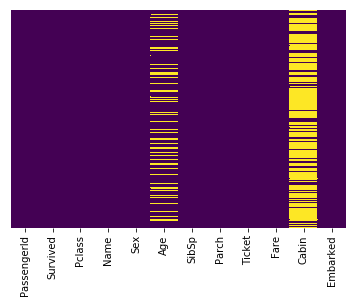

In [9]:
sns.heatmap(titanic_train.isnull(),yticklabels=False, cbar=False, cmap='viridis')

From the heatmap we see that there are missing values for Age and Cabin columns. We will attempt to fill in the data so that it can be used by our model

The first step is to use data visualization tools to observe any insightful information on trends between variables in the data

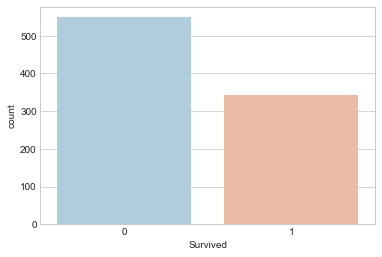

In [10]:
sns.set_style('whitegrid')
sns.countplot(x='Survived', data= titanic_train, palette='RdBu_r')

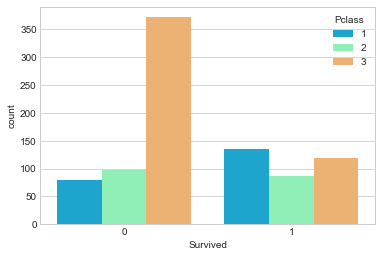

In [11]:
sns.set_style('whitegrid')
sns.countplot(x='Survived', hue='Pclass', data=titanic_train, palette='rainbow')

From the above countplot, we can see that a lot more people from thet 3rd class failed to survive

/Applications/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6448: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


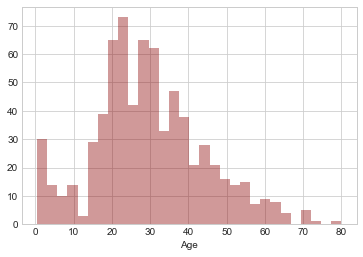

In [12]:
sns.distplot(titanic_train['Age'].dropna(), kde=False, color='darkred', bins=30)

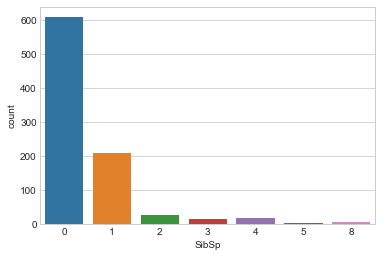

In [13]:
sns.countplot(x="SibSp", data=titanic_train)

<h2> 3) Data Cleaning </h2>

This section proceeds with making the dataset appropriate for the Logistic Regression model

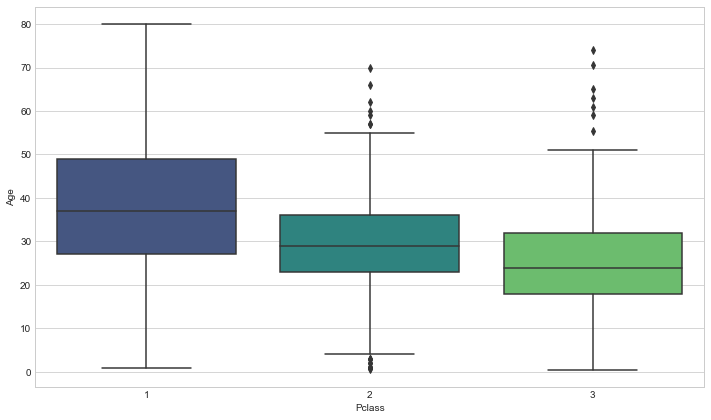

In [14]:
plt.figure(figsize=(12,7))
sns.boxplot(x='Pclass', y='Age', data=titanic_train, palette='viridis')

We notice that people from Class 1(wealthier) tend to be older. We will impute the Age column taking that into considration

In [15]:
def impute(cols):
    age = cols[0]
    pclass = cols[1]
    
    if pd.isnull(age):
        if pclass == 1:
            return np.mean(titanic_train[titanic_train['Pclass'] == 1]['Age'].dropna())
        
        elif pclass == 2:
            return np.mean(titanic_train[titanic_train['Pclass'] == 2]['Age'].dropna())
        
        else:
            return np.mean(titanic_train[titanic_train['Pclass'] == 3]['Age'].dropna())
        
    else:
        return age

In [16]:
titanic_train['Age'] = titanic_train[['Age', 'Pclass']].apply(impute,axis=1)

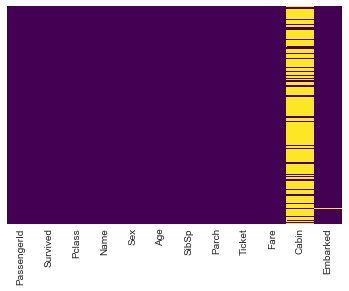

In [17]:
sns.heatmap(titanic_train.isnull(), yticklabels=False, cbar=False, cmap='viridis')

From the above heatmap, we see that we were able to impute our age data

In [18]:
titanic_train.drop('Cabin', axis=1, inplace=True)

In [19]:
titanic_train.dropna(inplace=True)

<h3> Convert Categorical Data </h3>

We need to convert relevant categorical data to a form our algorithm can understand. Here, we choose to do it in binary

In [20]:
titanic_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 11 columns):
PassengerId    889 non-null int64
Survived       889 non-null int64
Pclass         889 non-null int64
Name           889 non-null object
Sex            889 non-null object
Age            889 non-null float64
SibSp          889 non-null int64
Parch          889 non-null int64
Ticket         889 non-null object
Fare           889 non-null float64
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(4)
memory usage: 83.3+ KB


In [21]:
sex = pd.get_dummies(titanic_train['Sex'],drop_first=True)
embark = pd.get_dummies(titanic_train['Embarked'], drop_first=True)

In [22]:
titanic_train.drop(['Sex','Embarked', 'Name', 'Ticket'], axis=1,inplace=True)

In [23]:
titanic_train = pd.concat([titanic_train,sex,embark], axis=1)

In [24]:
titanic_train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1


<h2> 4) Logistic Regression Model </h2>

Now, we can use the data and train our Logistic Regression Model

<h3> a) Train the model </h3>

In [39]:
X= titanic_train.drop(['Survived'], axis=1)

In [40]:
y = titanic_train['Survived']

In [46]:
from sklearn.model_selection import train_test_split

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [48]:
from sklearn.linear_model import LogisticRegression

In [49]:
logmodel = LogisticRegression()

<h3> b) Make predictions </h3>

In [50]:
logmodel.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [55]:
predictions = logmodel.predict(X_test)

<h2> 5) Evaluation of our model </h2>

In [60]:
from sklearn.metrics import classification_report

In [61]:
print(classification_report(y_test, predictions))

             precision    recall  f1-score   support

          0       0.82      0.87      0.85       167
          1       0.77      0.69      0.73       100

avg / total       0.80      0.81      0.80       267



From the classificatin report, we see that the precision of our model is 0.80 which means that 80% of the dataSet was correctly identified with its true value